# Plant Species Identification using Persistent Homology (OpenCV) 🌱

## Venation Extraction

In [274]:
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import cv2

from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage import filters, exposure

from tqdm import tqdm

In [146]:
def plt_RGB(opencv_image):
    plt.imshow(cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB))

### Load image

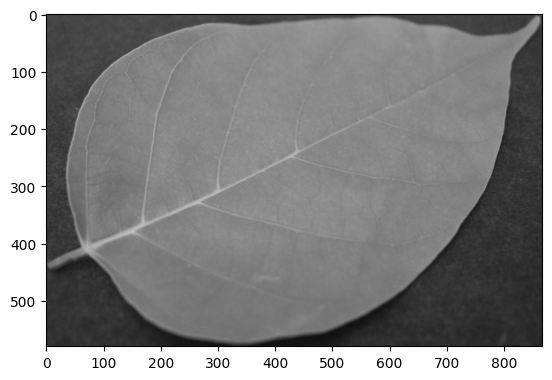

In [300]:
input_path = 'preprocessed_plant_leaves/'
# file_name = '0001_0001.JPG'
# file_name = '0007_0002.JPG'
# file_name = '0010_0001.JPG'
# file_name = '0008_0001.JPG'

img = cv2.imread(input_path + file_name, cv2.IMREAD_GRAYSCALE)
plt_RGB(img)

### Blurr

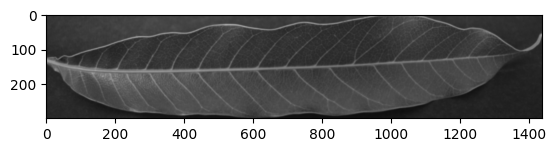

In [155]:
k = 5
img = cv2.GaussianBlur(img, (k, k), 0)
plt_RGB(img)

Detect ridges following [dsp.stackexchange.com/questions/1714/best-way-of-segmenting-veins-in-leaves](https://dsp.stackexchange.com/questions/1714/best-way-of-segmenting-veins-in-leaves) (acccessed 11 April 2023).

In [346]:
def detect_ridges(img, sigma=2, normalize=True):
    _, maximal_eig = hessian_matrix_eigvals(hessian_matrix(img, sigma=sigma, use_gaussian_derivatives=False))
    if normalize:
        # normalize i2 values to [0, 255]
        maximal_eig = (255*(maximal_eig - maximal_eig.min())/np.ptp(maximal_eig)).astype(int) 
    return maximal_eig.astype('uint8')

In [347]:
ridges = detect_ridges(result, sigma=1)

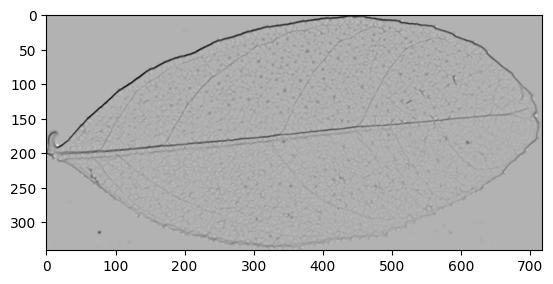

In [348]:
plt.imshow(ridges, cmap='gray')

Increase contrast

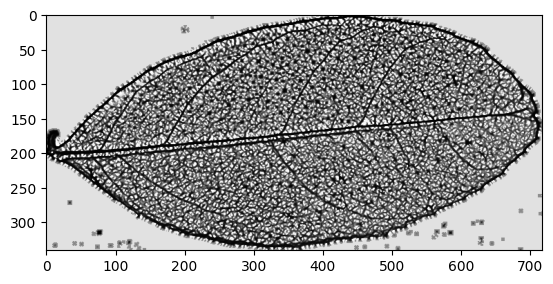

In [349]:
ridges_hist = cv2.equalizeHist(ridges)
plt.imshow(ridges_hist, cmap='gray')

Use [Otsu's method](https://en.wikipedia.org/wiki/Otsu%27s_method) to find optimal threshold value

In [350]:
threshold = filters.threshold_otsu(ridges_hist)
print('Optimal threshold: ' + str(threshold))
binarized = (ridges_hist < threshold)

Optimal threshold: 142


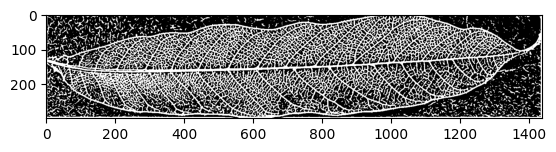

In [161]:
plt.imshow(binarized, cmap='gray')

### Apply Curves

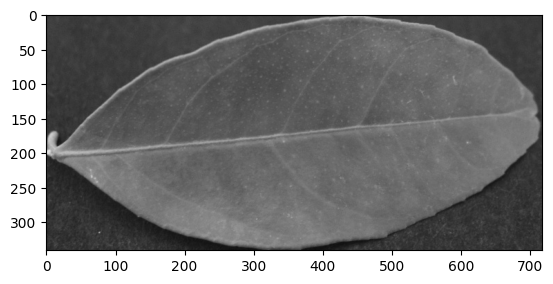

In [329]:
input_path = 'preprocessed_plant_leaves/'
# file_name = '0001_0001.JPG'
# file_name = '0007_0002.JPG'
file_name = '0010_0001.JPG'
# file_name = '0008_0001.JPG'

img = cv2.imread(input_path + file_name, cv2.IMREAD_GRAYSCALE)
plt_RGB(img)

Apply curves

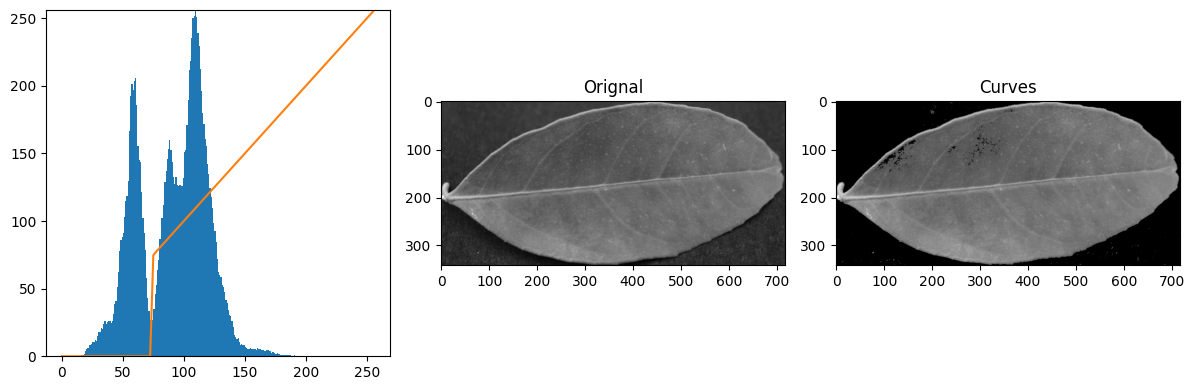

In [355]:
x = [0, 73, 75, 256]
y = [0, 0, 75, 256]

spl = scipy.interpolate.interp1d(x, y)
LUT = spl(range(256))

# Apply the LUT to the image
result = cv2.LUT(img, LUT)

# Display the result
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

hist, bins = exposure.histogram(img, nbins=256)
max_bin_idx = np.argmax(hist)
x = 256  # maximum height for the tallest bin
scaling_factor = x / hist[max_bin_idx]
weights = np.ones_like(img.flatten()) * scaling_factor

X = np.linspace(0, 256, 100)
Y = spl(X)
axs[0].hist(img.flatten(), bins=bins, weights=weights)
axs[0].plot(X, Y)
axs[0].set_ylim(0, 256)
axs[1].imshow(img, cmap='gray')
axs[1].set_title('Orignal')
axs[2].imshow(result, cmap='gray')
axs[2].set_title('Curves')
fig.tight_layout()
plt.show()

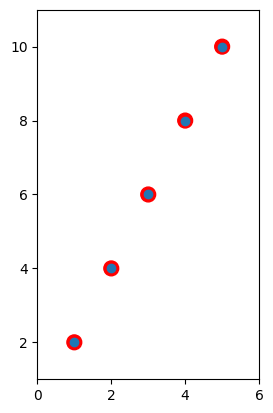

In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Sample data
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

# Create the scatter plot
fig, ax = plt.subplots()


# Add a disc around each point
for i in range(len(x)):
    circle = Circle((x[i], y[i]), radius=0.2, facecolor='r', edgecolor='r')
    ax.add_patch(circle)

ax.scatter(x, y)

# Set the axis limits
ax.set_xlim(min(x)-1, max(x)+1)
ax.set_ylim(min(y)-1, max(y)+1)

plt.gca().set_aspect('equal')

# Show the plot
plt.show()

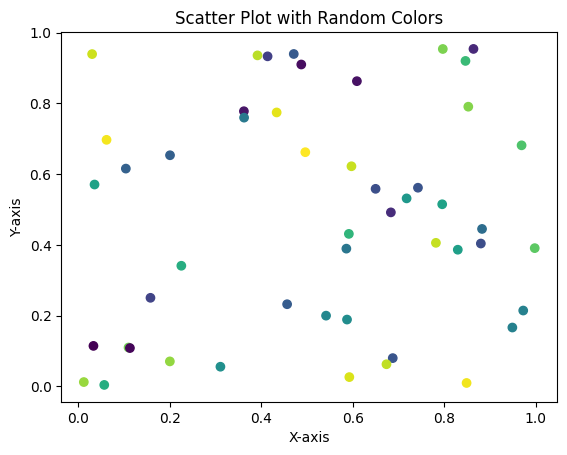

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)

# Create a scatter plot with colors
plt.scatter(x, y, c=colors)

# Set the title and labels
plt.title('Scatter Plot with Random Colors')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()

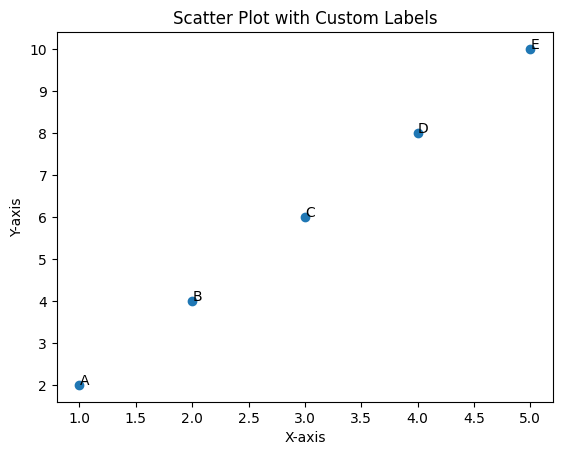

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample dataframe with labels in the first column
df = pd.DataFrame({'Label': ['A', 'B', 'C', 'D', 'E'],
                   'X': [1, 2, 3, 4, 5],
                   'Y': [2, 4, 6, 8, 10]})

# Create a scatter plot with custom labels
plt.scatter(df['X'], df['Y'])
for i, label in enumerate(df['Label']):
    plt.annotate(label, (df['X'][i], df['Y'][i]))

# Set the title and labels
plt.title('Scatter Plot with Custom Labels')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show the plot
plt.show()


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
input_path = '../plant_leaves/'
file_names = ['0001_0001.JPG', '0007_0002.JPG', '0010_0005.JPG', '0008_0001.JPG']
label_to_name = {
    '0001' : 'Mango',
    '0007' : 'Pongamia Pinnata',
    '0008' : 'Basil',
    '0010' : 'Lemon'
}

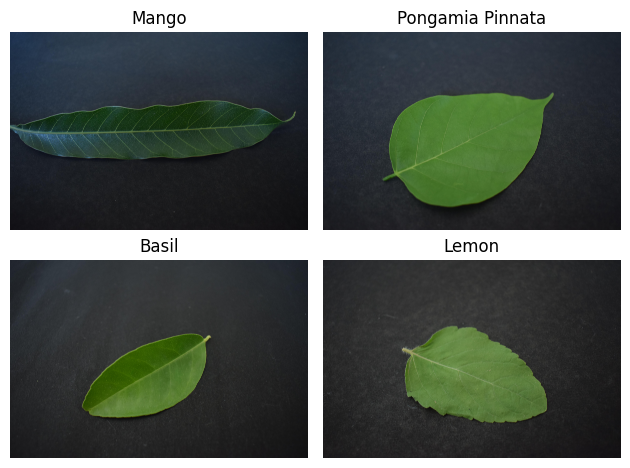

In [33]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row')

images = []

for file_name in file_names:
    images.append(cv2.imread(input_path + file_name))

axs[0, 0].imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Mango')
axs[0, 0].set_axis_off()
axs[0, 1].imshow(cv2.cvtColor(images[1], cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Pongamia Pinnata')
axs[0, 1].set_axis_off()
axs[1, 0].imshow(cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Basil')
axs[1, 0].set_axis_off()
axs[1, 1].imshow(cv2.cvtColor(images[3], cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Lemon')
axs[1, 1].set_axis_off()

plt.tight_layout()
plt.savefig("../plots/sammpleofdata.pdf", format="pdf")
plt.show()

In [18]:
import glob
import os
import numpy as np

import matplotlib.pyplot as plt

In [27]:
input_path = '../preprocessed_plant_leaves/'
file_paths = glob.glob(input_path + "/*.JPG")
file_names = [os.path.basename(file_name) for file_name in file_paths]

In [28]:
file_sizes = []

for file_name in file_names:
    file_sizes.append(os.stat(input_path + file_name).st_size)

In [29]:
min_size = min(file_sizes)
max_size = max(file_sizes)

average_bytes = np.mean(file_sizes)
average_mb = average_bytes / (1024 * 1024)
file_sizes_mb = [file_size / (1024 * 1024) for file_size in file_sizes]

In [33]:
print(f'average size {average_bytes} bytes, {average_mb} MB, min {min_size / (1024 * 1024)} max {max_size}')

average size 125512.35625 bytes, 0.11969791054725647 MB, min 0.034389495849609375 max 273240


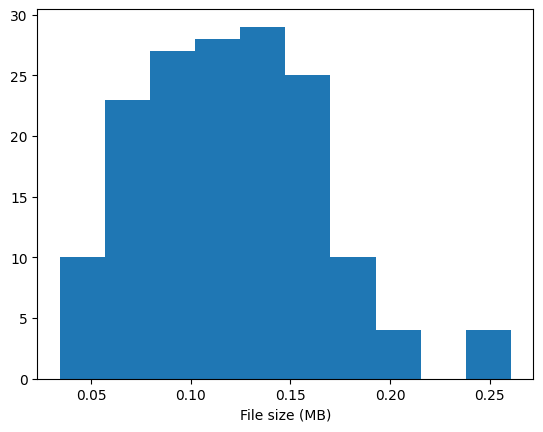

In [31]:
plt.hist(file_sizes_mb)
plt.xlabel('File size (MB)')
plt.savefig("../plots/filesizes.pdf", format="pdf")
plt.show()